#Transición energética en sudamérica

Para el análisis de la base de datos de acuerdo con el objetivo del proyecto:

1. Describir el estado de los países seleccionados en cuanto a generación y consumo de energías renovables y/o dependencias de  antes de la firma del acuerdo de los objetivos de desarrollo ODS

2. Describir el estado de los países seleccionados respecto a generación y consumo de energías renovables y/o dependencias de combustibles fosiles luego de la firma de los objetivos de desarrollo ODS

Objetivo principal: Evaluar y comparar el impacto de la adopción de los Objetivos de Desarrollo Sostenible (ODS) en las políticas de transición energética en países sudamericanos como Colombia, Brasil, Chile, Argentina, Uruguay y Perú entre 2015 y 2024.

##Base de datos

###Importaciones iniciales

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Carga de la base de datos a un dataframe

Se hace una descripción inicial de todo el conjunto de datos y una exploración inicial de los diferentes valores encontrados para los diferentes atributos.

In [ ]:
path = "/content/drive/MyDrive/Bootcamp analisis de datos/IRENA_Stats_extract_2025 H2(Country).csv"
df_proy = pd.read_csv(path, sep=';', encoding='latin-1')
print(df_proy.info())
df_proy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91743 entries, 0 to 91742
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Region                                         91743 non-null  object 
 1   Sub-region                                     91743 non-null  object 
 2   Country                                        91743 non-null  object 
 3   ISO3 code                                      91743 non-null  object 
 4   M49 code                                       91743 non-null  int64  
 5   RE or Non-RE                                   91743 non-null  object 
 6   Group Technology                               91743 non-null  object 
 7   Technology                                     91743 non-null  object 
 8   Sub-Technology                                 91743 non-null  object 
 9   Producer Type                                  917

,Region,Sub-region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Heat Generation (TJ),Public Flows (2022 USD M),SDG 7a1 Intl. Public Flows (2022 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
0,Africa,Northern Africa,Algeria,DZA,12,Total Renewable,Bioenergy,Solid biofuels,Other primary solid biofuels n.e.s.,All types,2000,NaN,NaN,NaN,NaN,NaN,0.0
1,Africa,Northern Africa,Algeria,DZA,12,Total Renewable,Bioenergy,Solid biofuels,Other primary solid biofuels n.e.s.,All types,2001,NaN,NaN,NaN,NaN,NaN,0.0
2,Africa,Northern Africa,Algeria,DZA,12,Total Renewable,Bioenergy,Solid biofuels,Other primary solid biofuels n.e.s.,All types,2002,NaN,NaN,NaN,NaN,NaN,0.0
3,Africa,Northern Africa,Algeria,DZA,12,Total Renewable,Bioenergy,Solid biofuels,Other primary solid biofuels n.e.s.,All types,2003,NaN,NaN,NaN,NaN,NaN,0.0
4,Africa,Northern Africa,Algeria,DZA,12,Total Renewable,Bioenergy,Solid biofuels,Other primary solid biofuels n.e.s.,All types,2004,NaN,NaN,NaN,NaN,NaN,0.0


####Regiones, subregiones y países en la base de datos

In [ ]:
df_proy['Region'].unique()

array(['Africa', 'Americas', 'Asia', 'Europe', 'Multilateral', 'Oceania',
       'Unspecified countries'], dtype=object)

In [ ]:
df_proy.groupby('Region')['Sub-region'].unique()

,Sub-region
Region,
Africa,"[Northern Africa, Sub-Saharan Africa]"
Americas,"[Latin America and the Caribbean, Northern Ame..."
Asia,"[(blank), Central Asia, Eastern Asia, Other As..."
Europe,"[(blank), Eastern Europe, Europe, Northern Eur..."
Multilateral,[Multilateral]
Oceania,"[(blank), Australia and New Zealand, Melanesia..."
Unspecified countries,[(blank)]


In [ ]:
df_proy.groupby('Sub-region')['Country'].unique()

,Country
Sub-region,
(blank),[Residual/unallocated ODA: Central Asia and So...
Australia and New Zealand,"[Australia, New Zealand]"
Central Asia,"[Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenis..."
Eastern Asia,"[China, China, Hong Kong Special Administrativ..."
Eastern Europe,"[Belarus, Bulgaria, Czechia, Hungary, Kosovo, ..."
Europe,[Residual/unallocated ODA: Northern America an...
Latin America and the Caribbean,"[Anguilla, Antigua and Barbuda, Argentina, Aru..."
Melanesia,"[Fiji, New Caledonia, Papua New Guinea, Solomo..."
Micronesia,"[Guam, Kiribati, Marshall Islands (the), Micro..."


In [ ]:
df_proy.loc[df_proy['Sub-region'] == 'Latin America and the Caribbean']['Country'].unique()

array(['Anguilla', 'Antigua and Barbuda', 'Argentina', 'Aruba',
       'Bahamas (the)', 'Barbados', 'Belize',
       'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Brazil',
       'British Virgin Islands', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Cuba', 'Curaçao', 'Dominica',
       'Dominican Republic (the)', 'Ecuador', 'El Salvador',
       'Falkland Islands (Malvinas)', 'French Guiana', 'Grenada',
       'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti', 'Honduras',
       'Jamaica', 'Martinique', 'Mexico', 'Montserrat', 'Nicaragua',
       'Panama', 'Paraguay', 'Peru', 'Puerto Rico',
       'Residual/unallocated ODA: Latin America and the Caribbean',
       'Saint Barthélemy', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Martin (French Part)', 'Saint Vincent and the Grenadines',
       'Sint Maarten (Dutch Part)',
       'South Georgia and the South Sandwich Islands', 'Suriname',
       'Trinidad and Tobago', 'Turks and Caico

##Selección de datos y limpieza de base de datos

Basados en el objetivo de análisis, un primer paso para la limpieza de la base de datos consiste en la obtención de un subconjunto del dataset que se compone únicamente de la información de los países seleccionados. El subconjunto de datos se reduce de un total inicial de 91743 filas a 3469 filas

In [ ]:
sub = df_proy.loc[(df_proy['Country'] == 'Colombia') | (df_proy['Country'] == 'Chile') | (df_proy['Country'] == 'Uruguay') |
                  (df_proy['Country']=='Argentina') | (df_proy['Country'] == 'Peru') | (df_proy['Country']=='Brazil')]
sub.shape

(3469, 17)

###Información temporal

Exploramos para que años se cuenta con información dentro del subconjunto obtenido

In [ ]:
sub['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024])

###Evaluación de registros por país

Identificamos el total de registros asociados a cada país

In [ ]:
sub['Country'].value_counts()

,count
Country,
Brazil,772
Argentina,761
Chile,530
Peru,497
Colombia,462
Uruguay,447


###Descripción del subconjuto

A partir de una descripción inicial con la función info se identifican columnas criticas pues la mayoría de sus valores son datos nulos. Dichas columnas se relaciona con información sobre inversión extranjera a proyectos de energía renovable, en especial los indicadores SDG 7a1 y SDG 7b1. Igualmente la columna de calor generado (Heat Generation (TJ)) no posee datos no nulos, por lo tanto esta columna será eliminada del dataset para los análisis posteriores.

Definición de los indicadores

SDG 7a1: Asociado al objetivo de desarrollo sostenible 7: acceso a energía limpia de forma segura y sostenible. Este indicador mide la cooperación internacional a partir de los flujos de capital desde países desarrollados hacia los países en vía de desarrollo para financiar proyectos de generación de energías limpias, renovables y sostenibles

SDG 7b1: Igualmente se asocia al objetivo de desarrolo sostenible 7 y dicho indicador mide la capacidad de energía renovable instalada y generando per capita, medido en W/habtitante

In [ ]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3469 entries, 14559 to 74073
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Region                                         3469 non-null   object 
 1   Sub-region                                     3469 non-null   object 
 2   Country                                        3469 non-null   object 
 3   ISO3 code                                      3469 non-null   object 
 4   M49 code                                       3469 non-null   int64  
 5   RE or Non-RE                                   3469 non-null   object 
 6   Group Technology                               3469 non-null   object 
 7   Technology                                     3469 non-null   object 
 8   Sub-Technology                                 3469 non-null   object 
 9   Producer Type                                  3469 

###Exploración de columnas criticas

Evaluamos como estan distribuidos los valores nulos de las columnas criticas y así explorar si existe una distribucción sesgada, es decir, donde los valores no nulos esten asociados principalmente a un único país y se observa que los datos nulos y no nulos se distribuyen de manera relativamente uniforme, a excepción del indicador SDG 7b1 en que existen valores nulos entre 67% a 81%

In [ ]:
colombia_data = sub.loc[sub['Country'] == 'Colombia']
argentina_data = sub.loc[sub['Country'] == 'Argentina']
chile_data = sub.loc[sub['Country'] == 'Chile']
brasil_data = sub.loc[sub['Country'] == 'Brazil']
peru_data = sub.loc[sub['Country'] == 'Peru']
uruguay_data = sub.loc[sub['Country'] == 'Uruguay']

In [ ]:
for country in [colombia_data, argentina_data, chile_data, brasil_data, peru_data, uruguay_data]:

  print(country['Country'].unique()[0], end='\n\n')
  for col in ['Public Flows (2022 USD M)', 'SDG 7a1 Intl. Public Flows (2022 USD M)', 'SDG 7b1 RE capacity per capita (W/inhabitant)']:

    print(f" valores nulos en columna '{col}': {country[col].isna().sum()} de {country.shape[0]} es decir un {country[col].isna().sum()*100/country.shape[0]:.2f}%")

  print()

Colombia

 valores nulos en columna 'Public Flows (2022 USD M)': 389 de 462 es decir un 84.20%
 valores nulos en columna 'SDG 7a1 Intl. Public Flows (2022 USD M)': 418 de 462 es decir un 90.48%
 valores nulos en columna 'SDG 7b1 RE capacity per capita (W/inhabitant)': 318 de 462 es decir un 68.83%

Argentina

 valores nulos en columna 'Public Flows (2022 USD M)': 676 de 761 es decir un 88.83%
 valores nulos en columna 'SDG 7a1 Intl. Public Flows (2022 USD M)': 702 de 761 es decir un 92.25%
 valores nulos en columna 'SDG 7b1 RE capacity per capita (W/inhabitant)': 617 de 761 es decir un 81.08%

Chile

 valores nulos en columna 'Public Flows (2022 USD M)': 465 de 530 es decir un 87.74%
 valores nulos en columna 'SDG 7a1 Intl. Public Flows (2022 USD M)': 476 de 530 es decir un 89.81%
 valores nulos en columna 'SDG 7b1 RE capacity per capita (W/inhabitant)': 386 de 530 es decir un 72.83%

Brazil

 valores nulos en columna 'Public Flows (2022 USD M)': 586 de 772 es decir un 75.91%
 valores 

####Exploración de valores nulos y no nulos en columnas criticas

A que tipo de energías se estan dirigiendo el total de inversión pública

In [ ]:
non_null_index = sub['Public Flows (2022 USD M)'].dropna().index
no_null_data = sub.loc[non_null_index]
no_null_data.tail()

,Region,Sub-region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Heat Generation (TJ),Public Flows (2022 USD M),SDG 7a1 Intl. Public Flows (2022 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
73994,Americas,Latin America and the Caribbean,Uruguay,URY,858,Total Non-Renewable,Fossil fuels,Fossil fuels n.e.s.,Fossil fuels n.e.s.,All types,2013,NaN,NaN,NaN,69.89,NaN,NaN
74070,Americas,Latin America and the Caribbean,Uruguay,URY,858,Total Non-Renewable,Nuclear,Nuclear,Nuclear,All types,2008,NaN,NaN,NaN,0.48,NaN,NaN
74071,Americas,Latin America and the Caribbean,Uruguay,URY,858,Total Non-Renewable,Nuclear,Nuclear,Nuclear,All types,2009,NaN,NaN,NaN,0.03,NaN,NaN
74072,Americas,Latin America and the Caribbean,Uruguay,URY,858,Total Non-Renewable,Nuclear,Nuclear,Nuclear,All types,2010,NaN,NaN,NaN,0.11,NaN,NaN
74073,Americas,Latin America and the Caribbean,Uruguay,URY,858,Total Non-Renewable,Nuclear,Nuclear,Nuclear,All types,2015,NaN,NaN,NaN,0.46,NaN,NaN


In [ ]:
no_null_data.groupby(['Country', 'RE or Non-RE'])['Public Flows (2022 USD M)'].sum()

Country    RE or Non-RE       
Argentina  Total Non-Renewable      489.68
           Total Renewable         5859.01
Brazil     Total Non-Renewable    28854.75
           Total Renewable        72982.26
Chile      Total Non-Renewable      530.25
           Total Renewable         4064.75
Colombia   Total Non-Renewable      116.13
           Total Renewable         3030.12
Peru       Total Non-Renewable      712.81
           Total Renewable         2268.68
Uruguay    Total Non-Renewable       97.78
           Total Renewable         1211.48
Name: Public Flows (2022 USD M), dtype: float64

Como se distribuyen las inversion de países extranjeros para la financiación de tecnologías de energías renovables en países en vía de desarrollo

In [ ]:
non_null_index = sub['SDG 7a1 Intl. Public Flows (2022 USD M)'].dropna().index
no_null_data = sub.loc[non_null_index]
no_null_data.tail()

,Region,Sub-region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Heat Generation (TJ),Public Flows (2022 USD M),SDG 7a1 Intl. Public Flows (2022 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
27250,Americas,Latin America and the Caribbean,Uruguay,URY,858,Total Renewable,Solar energy,Solar energy,Solar energy,All types,2009,NaN,NaN,NaN,NaN,6.66,0.03
27256,Americas,Latin America and the Caribbean,Uruguay,URY,858,Total Renewable,Solar energy,Solar energy,Solar energy,All types,2015,NaN,NaN,NaN,NaN,63.15,19.14
27311,Americas,Latin America and the Caribbean,Uruguay,URY,858,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,All types,2013,NaN,NaN,NaN,143.30,137.41,17.76
27312,Americas,Latin America and the Caribbean,Uruguay,URY,858,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,All types,2014,NaN,NaN,NaN,272.36,193.82,143.39
27313,Americas,Latin America and the Caribbean,Uruguay,URY,858,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,All types,2015,NaN,NaN,NaN,158.49,163.25,254.38


In [ ]:
no_null_data.groupby(['Country', 'RE or Non-RE'])['SDG 7a1 Intl. Public Flows (2022 USD M)'].sum()

,,SDG 7a1 Intl. Public Flows (2022 USD M)
Country,RE or Non-RE,
Argentina,Total Renewable,5395.96
Brazil,Total Renewable,6486.78
Chile,Total Renewable,3748.24
Colombia,Total Renewable,2839.65
Peru,Total Renewable,2251.13
Uruguay,Total Renewable,1148.93


¿Qué capacidades de energía renovable existe en los países seleccionados? Asociado al indicador SDG 7b1

In [ ]:
non_null_index = sub['SDG 7b1 RE capacity per capita (W/inhabitant)'].dropna().index
no_null_data = sub.loc[non_null_index]
no_null_data.tail()

,Region,Sub-region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Heat Generation (TJ),Public Flows (2022 USD M),SDG 7a1 Intl. Public Flows (2022 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
27317,Americas,Latin America and the Caribbean,Uruguay,URY,858,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,All types,2019,NaN,NaN,NaN,NaN,NaN,446.39
27318,Americas,Latin America and the Caribbean,Uruguay,URY,858,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,All types,2020,NaN,NaN,NaN,NaN,NaN,446.16
27319,Americas,Latin America and the Caribbean,Uruguay,URY,858,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,All types,2021,NaN,NaN,NaN,NaN,NaN,446.46
27320,Americas,Latin America and the Caribbean,Uruguay,URY,858,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,All types,2022,NaN,NaN,NaN,NaN,NaN,447.22
27321,Americas,Latin America and the Caribbean,Uruguay,URY,858,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,All types,2023,NaN,NaN,NaN,NaN,NaN,447.59


In [ ]:
no_null_data.groupby(['Country', 'RE or Non-RE'])['SDG 7b1 RE capacity per capita (W/inhabitant)'].sum()

,,SDG 7b1 RE capacity per capita (W/inhabitant)
Country,RE or Non-RE,
Argentina,Total Renewable,6158.20
Brazil,Total Renewable,12881.71
Chile,Total Renewable,11366.21
Colombia,Total Renewable,5517.19
Peru,Total Renewable,3459.76
Uruguay,Total Renewable,17488.51


###Eliminación de columnas

De acuerdo a la exploración previa eliminamos las siguientes columnas, debido a que no aportan información importante

1. Region  y sub-Region: Se eligieron países de sudamérica
2. Códigos de los países ISO3 code y M49 code, son codificaciones útiles si se explora el dataset completo
2. Calor generado (Heat Generation (TJ); pues todos sus valores son nulos en el subconjunto seleccionado

In [ ]:
sub.drop(columns=['Region', 'Sub-region', 'ISO3 code', 'M49 code', 'Heat Generation (TJ)'], inplace=True)

###Exportación de base de datos limpia

In [ ]:
sub.to_csv('cleaned_energy_database.csv')

##Exploración para normalización de base de datos

Con el objetivo de aplicar los conocimientos del manejo de las bases de datos SQL, se hace una normalización de los datos identificando diferentes columnas que pueden convertirse en tablas distintas. En este sentido se identificaron las siguientes posibles tablas

1. producer_type: Columna de información del tipo de producción Off-grid, On-grid, All types

2. countries: Columna de países

3. group_technology - technology - sub-technology: Tres tablas para la clasificación de cada una de las tecnologías

La columna 'Re or Non-RE' se convirtió en un atributo booleano en la tabla de group_technology que indica si la tecnología es totalmente renovable o no lo es, pues estas son las dos únicas categorías dentro del dataset

In [ ]:
sub['RE or Non-RE'].unique()

array(['Total Renewable', 'Total Non-Renewable'], dtype=object)

###Valores y conteos

Se exploran los valores únicos de categorías tecnologicas para tener una idea de la cantidad de valores y el tipo de dato a utilizar en las llaves primaria, se busca aplicar optimización de espacio utilizando el tipo de dato entero más pequeño que satisfaga los diferentes valores de cada columna

In [ ]:
sub['Group Technology'].unique()

array(['Bioenergy', 'Geothermal energy',
       'Hydropower (excl. Pumped Storage)', 'Marine energy',
       'Multiple renewables*', 'Solar energy', 'Wind energy',
       'Fossil fuels', 'Nuclear', 'Pumped storage',
       'Other non-renewable energy'], dtype=object)

No existen valores que impliquen tecnologías hibridas entre renovables y no renovables pero si entre renovables

In [ ]:
sub.loc[sub['Group Technology'] == 'Multiple renewables*']['Technology'].unique()

array(['Multiple renewables*'], dtype=object)

In [ ]:
len(sub['Sub-Technology'].unique())

37

In [ ]:
sub['Technology'].unique()

array(['Biogas', 'Liquid biofuels', 'Renewable municipal waste',
       'Solid biofuels', 'Geothermal energy', 'Renewable hydropower',
       'Marine energy', 'Multiple renewables*', 'Solar energy',
       'Solar photovoltaic', 'Solar thermal energy',
       'Onshore wind energy', 'Coal and peat', 'Fossil fuels n.e.s.',
       'Natural gas', 'Oil', 'Nuclear', 'Pumped storage',
       'Other non-renewable energy'], dtype=object)

In [ ]:
sub['Sub-Technology'].unique()

array(['Landfill gas', 'Other biogases from anaerobic fermentation',
       'Liquid biofuels', 'Renewable municipal waste', 'Bagasse',
       'Other primary solid biofuels n.e.s.', 'Rice husks', 'Wood fuel',
       'Wood waste', 'Geothermal energy', 'Renewable hydropower',
       'Marine energy', 'Multiple renewables*', 'Solar energy',
       'Off-grid Solar photovoltaic', 'On-grid Solar photovoltaic',
       'Solar thermal energy', 'Onshore wind energy', 'Biogas',
       'Biogases from thermal processes', 'Biodiesel', 'Biogasoline',
       'Conventional biogasoline', 'Other liquid biofuels',
       'Black liquor', 'Energy crops', 'Sewage sludge gas', 'Straw',
       'Concentrated solar power', 'Other vegetal and agricultural waste',
       'Coal and peat', 'Fossil fuels n.e.s.', 'Natural gas', 'Oil',
       'Nuclear', 'Pumped storage', 'Other non-renewable energy'],
      dtype=object)

##Análisis iniciales

In [ ]:
sub.columns

Index(['Country', 'RE or Non-RE', 'Group Technology', 'Technology',
       'Sub-Technology', 'Producer Type', 'Year',
       'Electricity Generation (GWh)', 'Electricity Installed Capacity (MW)',
       'Public Flows (2022 USD M)', 'SDG 7a1 Intl. Public Flows (2022 USD M)',
       'SDG 7b1 RE capacity per capita (W/inhabitant)'],
      dtype='object')

In [ ]:
sub.head()

,Country,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Public Flows (2022 USD M),SDG 7a1 Intl. Public Flows (2022 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
14559,Argentina,Total Renewable,Bioenergy,Biogas,Landfill gas,Off-grid electricity,2000,4.88,1.86,NaN,NaN,NaN
14560,Argentina,Total Renewable,Bioenergy,Biogas,Landfill gas,Off-grid electricity,2001,4.88,1.86,NaN,NaN,NaN
14561,Argentina,Total Renewable,Bioenergy,Biogas,Landfill gas,Off-grid electricity,2002,4.88,1.86,NaN,NaN,NaN
14562,Argentina,Total Renewable,Bioenergy,Biogas,Landfill gas,Off-grid electricity,2003,4.88,1.86,NaN,NaN,NaN
14563,Argentina,Total Renewable,Bioenergy,Biogas,Landfill gas,Off-grid electricity,2004,4.88,1.86,NaN,NaN,NaN


###Tipos de producción

Se examina si existen datos de las columnas de interes para cada tipo de producción

In [ ]:
sub['Producer Type'].value_counts()

,count
Producer Type,
On-grid electricity,1621
All types,1202
Off-grid electricity,646


In [ ]:
sub.groupby('Producer Type')[['Electricity Generation (GWh)', 'Electricity Installed Capacity (MW)',
                             'Public Flows (2022 USD M)', 'SDG 7a1 Intl. Public Flows (2022 USD M)',
                             'SDG 7b1 RE capacity per capita (W/inhabitant)']].sum()

,Electricity Generation (GWh),Electricity Installed Capacity (MW),Public Flows (2022 USD M),SDG 7a1 Intl. Public Flows (2022 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
Producer Type,,,,,
All types,0.00,0.00,120217.7,21870.69,56871.58
Off-grid electricity,101309.48,39457.36,0.0,0.00,0.00
On-grid electricity,19852232.63,5499538.16,0.0,0.00,0.00


###Agrupamiento

In [ ]:
grouped =sub.groupby(['Country', 'Group Technology','Producer Type'])[['Electricity Generation (GWh)', 'Electricity Installed Capacity (MW)',
                             'Public Flows (2022 USD M)', 'SDG 7a1 Intl. Public Flows (2022 USD M)',
                             'SDG 7b1 RE capacity per capita (W/inhabitant)']].sum()

grouped

Electricity Generation (GWh)  \
Country   Group Technology Producer Type                                        
Argentina Bioenergy        All types                                     0.00   
                           Off-grid electricity                       4219.44   
                           On-grid electricity                       27912.79   
          Fossil fuels     All types                                     0.00   
                           Off-grid electricity                      20162.30   
...                                                                       ...   
Uruguay   Solar energy     Off-grid electricity                         67.93   
                           On-grid electricity                        2918.96   
          Wind energy      All types                                     0.00   
                           Off-grid electricity                        146.48   
                           On-grid electricity                       39205.19   

                                                 Electricity Installed Capacity (MW)  \
Country   Group Technology Producer Type                                               
Argentina Bioenergy        All types                                            0.00   
                           Off-grid electricity                              2261.25   
                           On-grid electricity                               3357.29   
          Fossil fuels     All types                                            0.00   
                           Off-grid electricity                              4598.64   
...                                                                              ...   
Uruguay   Solar energy     Off-grid electricity                                60.06   
                           On-grid electricity                               2279.38   
          Wind energy      All types                                            0.00   
                           Off-grid electricity                                54.00   
                           On-grid electricity                              14918.00   

                                                 Public Flows (2022 USD M)  \
Country   Group Technology Producer Type                                     
Argentina Bioenergy        All types                                185.39   
                           Off-grid electricity                       0.00   
                           On-grid electricity                        0.00   
          Fossil fuels     All types                                481.12   
                           Off-grid electricity                       0.00   
...                                                                    ...   
Uruguay   Solar energy     Off-grid electricity                       0.00   
                           On-grid electricity                        0.00   
          Wind energy      All types                                574.15   
                           Off-grid electricity                       0.00   
                           On-grid electricity                        0.00   

                                                 SDG 7a1 Intl. Public Flows (2022 USD M)  \
Country   Group Technology Producer Type                                                   
Argentina Bioenergy        All types                                              190.85   
                           Off-grid electricity                                     0.00   
                           On-grid electricity                                      0.00   
          Fossil fuels     All types                                                0.00   
                           Off-grid electricity                                     0.00   
...                                                                                  ...   
Uruguay   Solar energy     Off-grid electricity                                     0.00   
       

###Algunas gráficas

In [ ]:
bioenergy_col = grouped.loc[('Colombia', 'Bioenergy', 'On-grid electricity')][['Electricity Generation (GWh)', 'Electricity Installed Capacity (MW)',
                             'Public Flows (2022 USD M)', 'SDG 7a1 Intl. Public Flows (2022 USD M)',
                             'SDG 7b1 RE capacity per capita (W/inhabitant)']]
bioenergy_col.head()

,Colombia
,Bioenergy
,On-grid electricity
Electricity Generation (GWh),27082.45
Electricity Installed Capacity (MW),5051.25
Public Flows (2022 USD M),0.00
SDG 7a1 Intl. Public Flows (2022 USD M),0.00
SDG 7b1 RE capacity per capita (W/inhabitant),0.00


In [ ]:
group_col = sub.loc[(sub['Country']=='Colombia')].groupby(['Group Technology', 'Year'])[['Electricity Generation (GWh)', 'Electricity Installed Capacity (MW)',
                             'Public Flows (2022 USD M)', 'SDG 7a1 Intl. Public Flows (2022 USD M)',
                             'SDG 7b1 RE capacity per capita (W/inhabitant)']].sum()

In [ ]:
bioenergy_col = group_col.loc[('Bioenergy')]
bioenergy_col.head()

,Electricity Generation (GWh),Electricity Installed Capacity (MW),Public Flows (2022 USD M),SDG 7a1 Intl. Public Flows (2022 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
Year,,,,,
2000,696.06,80.0,0.0,0.0,2.05
2001,724.31,80.0,0.0,0.0,2.01
2002,752.81,80.0,0.0,0.0,1.98
2003,769.27,80.0,0.0,0.0,1.95
2004,789.47,80.0,0.0,0.0,1.93


In [ ]:
n = len(bioenergy_col)
bioenergy_col.drop(bioenergy_col.index[n-1], inplace=True)

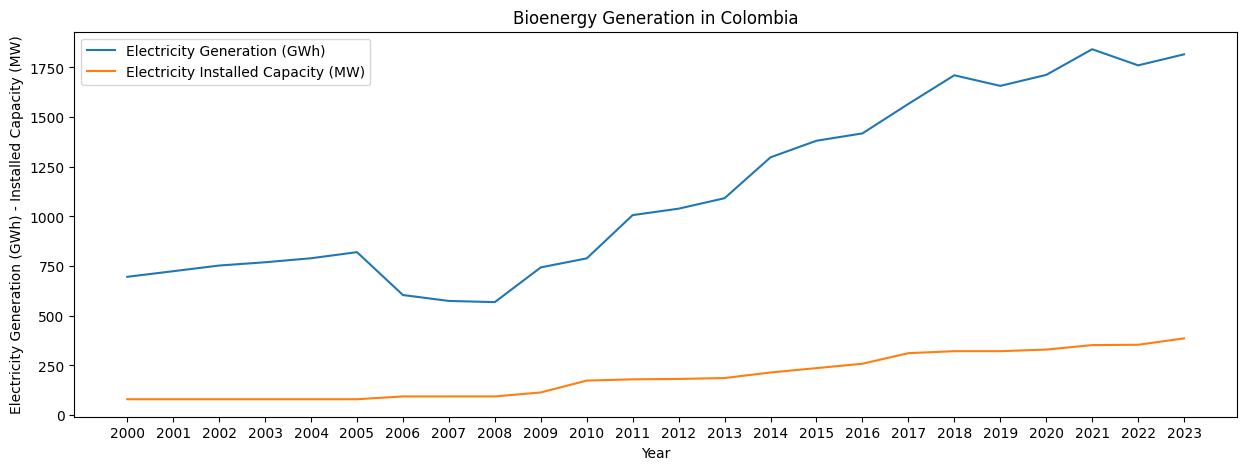

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))
plt.title('Bioenergy Generation in Colombia')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (GWh) - Installed Capacity (MW)')
plt.plot(bioenergy_col.index, bioenergy_col['Electricity Generation (GWh)'])
plt.plot(bioenergy_col.index, bioenergy_col['Electricity Installed Capacity (MW)'])
plt.legend(['Electricity Generation (GWh)', 'Electricity Installed Capacity (MW)'])
plt.xticks([y for y in range(2000,2024)])
plt.show()